In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"/kaggle/input/stroke-data/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
print("Remaining NaN in BMI:", df['bmi'].isnull().sum())

Remaining NaN in BMI: 0


In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.select_dtypes(include=['object']).columns


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [11]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

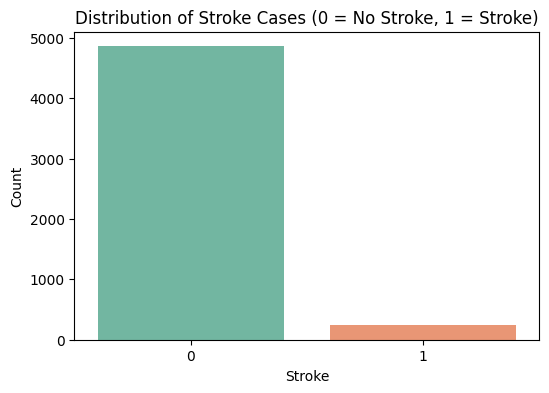

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title("Distribution of Stroke Cases (0 = No Stroke, 1 = Stroke)")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.show()


Stroke Count:
 stroke
0    4861
1     249
Name: count, dtype: int64

Stroke Percentage:
 stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


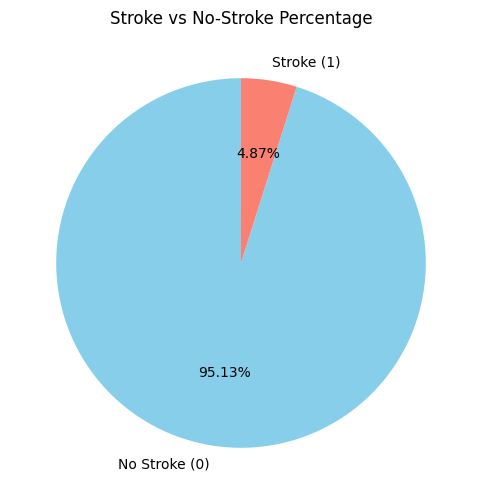

In [13]:
stroke_counts = df['stroke'].value_counts()
stroke_percent = df['stroke'].value_counts(normalize=True) * 100

print("Stroke Count:\n", stroke_counts)
print("\nStroke Percentage:\n", stroke_percent)

# Optional pie chart
plt.figure(figsize=(6,6))
plt.pie(stroke_counts, labels=['No Stroke (0)', 'Stroke (1)'],
        autopct='%1.2f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title("Stroke vs No-Stroke Percentage")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    stratify=y,
    random_state=42
)

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
y_train_res = pd.Series(y_train_res)
print("\nAfter SMOTE:")
print(y_train_res.value_counts())



After SMOTE:
stroke
0    3403
1    3403
Name: count, dtype: int64


In [16]:
!pip uninstall -y scikit-learn imbalanced-learn


Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
Found existing installation: imbalanced-learn 0.12.3
Uninstalling imbalanced-learn-0.12.3:
  Successfully uninstalled imbalanced-learn-0.12.3


In [17]:
!pip install scikit-learn==1.5.1 imbalanced-learn==0.12.3


  Using cached scikit_learn-1.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.1 which is incompatible.


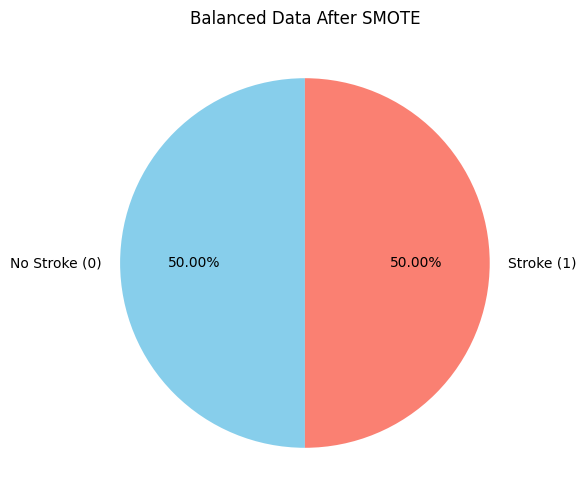

In [18]:
plt.figure(figsize=(6,6))
plt.pie(
    y_train_res.value_counts(),
    labels=['No Stroke (0)', 'Stroke (1)'],
    autopct='%1.2f%%',
    colors=['skyblue', 'salmon'],
    startangle=90
)
plt.title("Balanced Data After SMOTE")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train_res)

# ✅ Use print() instead of just 'model' to avoid estimator.js error
print("✅ Model trained successfully!")
print(model)


✅ Model trained successfully!
LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)


In [21]:
y_pred = model.predict(X_test_scaled)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1145  313]
 [  30   45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1458
           1       0.13      0.60      0.21        75

    accuracy                           0.78      1533
   macro avg       0.55      0.69      0.54      1533
weighted avg       0.93      0.78      0.84      1533

Accuracy: 0.776255707762557


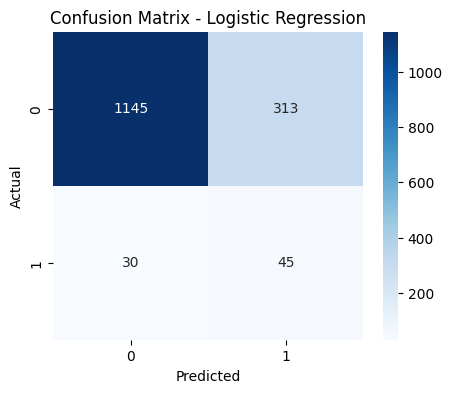

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_res)
y_pred_rf = rf_model.predict(X_test_scaled)
print("\n🔹 Random Forest Results 🔹")
print(classification_report(y_test, y_pred_rf))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train_res)
y_pred_dt = dt_model.predict(X_test_scaled)
print("\n🔹 Decision Tree Results 🔹")
print(classification_report(y_test, y_pred_dt))

# SVM (with balanced class weights)
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train_res)
y_pred_svm = svm_model.predict(X_test_scaled)
print("\n🔹 SVM Results 🔹")
print(classification_report(y_test, y_pred_svm))



# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train_res)

# Predictions
y_pred_nb = nb_model.predict(X_test_scaled)

print("\n🔹 Naive Bayes Classifier Results 🔹")
print(classification_report(y_test, y_pred_nb))




🔹 Random Forest Results 🔹
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1458
           1       0.12      0.21      0.15        75

    accuracy                           0.88      1533
   macro avg       0.54      0.56      0.54      1533
weighted avg       0.92      0.88      0.90      1533


🔹 Decision Tree Results 🔹
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1458
           1       0.14      0.35      0.20        75

    accuracy                           0.86      1533
   macro avg       0.55      0.62      0.56      1533
weighted avg       0.92      0.86      0.89      1533


🔹 SVM Results 🔹
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1458
           1       0.10      0.35      0.16        75

    accuracy                           0.82      1533
   macro avg       0.53      0.60      0.53      1533
wei

2025-11-13 17:15:29.895739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763054129.917572    2762 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763054129.924251    2762 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Remaining NaN values:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Before SMOTE:
stroke
0    3403
1     174
Name: count, dtype: int64

After SMOTE balancing:
stroke
0    3403
1    3403
Name: count, dtype: int64


I0000 00:00:1763054135.373321    2762 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100


I0000 00:00:1763054138.959233    2823 service.cc:148] XLA service 0x7d1330005540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763054138.959271    2823 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763054139.351141    2823 cuda_dnn.cc:529] Loaded cuDNN version 90300


 65/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5145 - loss: 1.0324

I0000 00:00:1763054141.625481    2823 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


171/171 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5503 - loss: 0.9689 - val_accuracy: 0.7298 - val_loss: 0.7755
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6882 - loss: 0.7519 - val_accuracy: 0.8965 - val_loss: 0.5684
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7380 - loss: 0.6778 - val_accuracy: 0.9126 - val_loss: 0.4944
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7560 - loss: 0.6490 - val_accuracy: 0.9170 - val_loss: 0.4653
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7686 - loss: 0.6230 - val_accuracy: 0.9185 - val_loss: 0.4530
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7814 - loss: 0.5922 - val_accuracy: 0.9251 - val_loss: 0.4301
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7788 - loss: 0.5896 - val_accuracy: 0.9273 - val_loss: 0.4207
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7836 - loss: 0.5708 - val_accuracy: 0.928

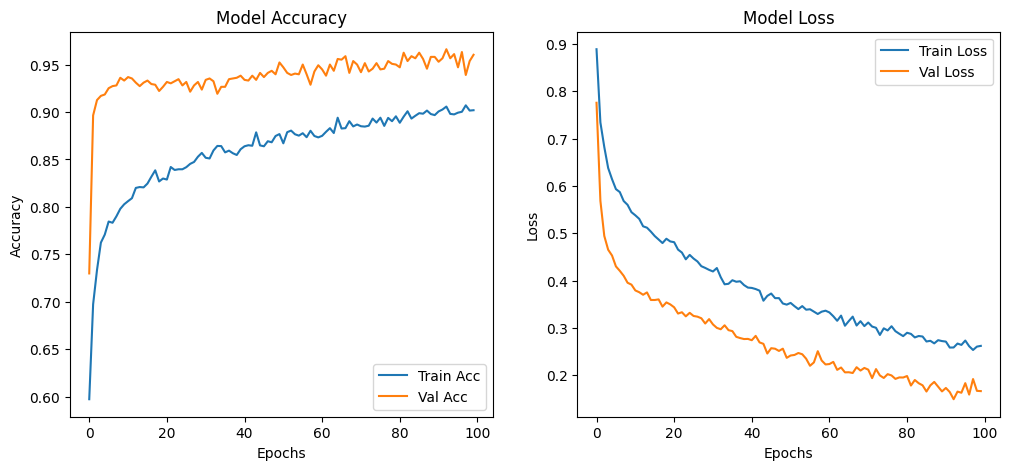

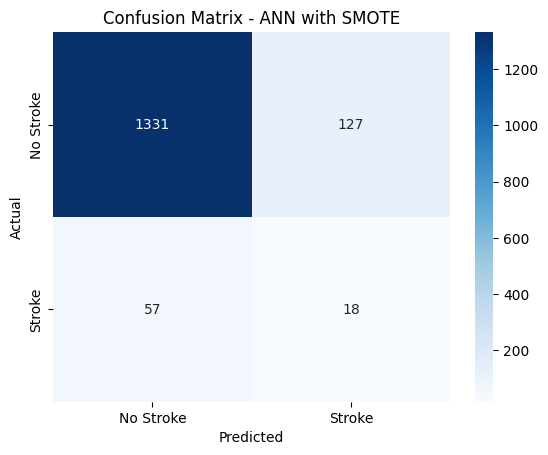

In [25]:
# ====================================================
# Stroke Prediction using ANN + SMOTE
# ====================================================

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, roc_auc_score, balanced_accuracy_score
)
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# ====================================================
# Load and preprocess data
# ====================================================
df = pd.read_csv(r"/kaggle/input/stroke-data/healthcare-dataset-stroke-data.csv")

# Drop ID column (not useful)
df.drop('id', axis=1, inplace=True)

# Fill missing BMI with median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

print("Remaining NaN values:\n", df.isnull().sum())

# ====================================================
# Separate features and target
# ====================================================
X = df.drop('stroke', axis=1)
y = df['stroke']

# ====================================================
# Identify column types
# ====================================================
num_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# ====================================================
#  Encode categorical columns
# ====================================================
preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])

X_encoded = preprocessor.fit_transform(X)

# ====================================================
# Split dataset
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42
)

print("Before SMOTE:")
print(y_train.value_counts())

# ====================================================
#  Apply SMOTE for balancing
# ====================================================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE balancing:")
print(y_train_res.value_counts())

# ====================================================
# Scale features
# ====================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# ====================================================
# Build ANN model
# ====================================================
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001),
          input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ====================================================
# Train model
# ====================================================
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_res,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ====================================================
# Evaluate model
# ====================================================
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# ====================================================
#  Plot accuracy and loss
# ====================================================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ====================================================
# Confusion Matrix Visualization
# ====================================================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN with SMOTE')
plt.show()
